In [1]:
import pandas as pd

csv_path = "/Users/superone77/Code/AlphaQuant/alpha_hill.csv"
df = pd.read_csv(csv_path)


pd.set_option("display.max_columns", None)
df.head()


,name,category,shape,out_features,in_features,numel,dtype,device,alpha_hill,k_used,k_frac,n_eigs,method,elapsed_ms,error
0,model.layers.0.self_attn.q_proj,attn_q,"[2048, 2048]",2048,2048,4194304,float32,cuda:0,1.614363,204,0.1,2048,svd_full,655.978,NaN
1,model.layers.0.self_attn.k_proj,attn_k,"[2048, 2048]",2048,2048,4194304,float32,cuda:0,1.748180,204,0.1,2048,svd_full,633.261,NaN
2,model.layers.0.self_attn.v_proj,attn_v,"[2048, 2048]",2048,2048,4194304,float32,cuda:0,2.555048,204,0.1,2048,svd_full,667.232,NaN
3,model.layers.0.self_attn.o_proj,attn_o,"[2048, 2048]",2048,2048,4194304,float32,cuda:0,3.397251,204,0.1,2048,svd_full,652.303,NaN
4,model.layers.0.mlp.gate,router_or_gate,"[64, 2048]",64,2048,131072,float32,cuda:0,2.862344,10,0.1,64,svd_full,46.344,NaN


In [2]:
# import matplotlib.pyplot as plt
# import numpy as np
# import colorsys
# from matplotlib.patches import Patch
# import os
# import re

# plot_df = df.copy()
# plot_df = plot_df[plot_df["name"].str.contains(r"layers\.\d+")].copy()
# plot_df["layer_id"] = plot_df["name"].str.extract(r"layers\.(\d+)", expand=False).astype(int)
# plot_df["linear_name"] = plot_df["name"].str.extract(r"layers\.\d+\.(.+)$", expand=False)
# plot_df["alpha"] = plot_df["alpha_hill"].astype(float)
# plot_df = plot_df.dropna(subset=["alpha"])
# plot_df["alpha_bin"] = np.floor(plot_df["alpha"]).astype(int)

# unique_bins = sorted(plot_df["alpha_bin"].unique())

# def pastel_color(index: int, total: int):
#     hue = (index / max(total, 1)) % 1.0
#     r, g, b = colorsys.hls_to_rgb(hue, 0.70, 0.40)
#     return (r, g, b)

# bin_to_color = {b: pastel_color(i, len(unique_bins)) for i, b in enumerate(unique_bins)}

# # ordering helpers for x-axis
# ATTN_ORDER = {"attn_q": 0, "attn_k": 1, "attn_v": 2, "attn_o": 3}

# def get_sort_tuple(name: str, category: str):
#     name_l = (name or "").lower()
#     cat = (category or "").lower()

#     if cat in ATTN_ORDER:
#         return (ATTN_ORDER[cat], 0, "")
#     if ".self_attn.q" in name_l:
#         return (0, 0, "")
#     if ".self_attn.k" in name_l:
#         return (1, 0, "")
#     if ".self_attn.v" in name_l:
#         return (2, 0, "")
#     if ".self_attn.o" in name_l:
#         return (3, 0, "")

#     if cat == "router_or_gate" or "router" in name_l or ".mlp.gate" in name_l or "gate" in name_l:
#         sub = 0 if "gate" in name_l else (1 if "router" in name_l else 2)
#         return (4, sub, "")

#     m = re.search(r"experts?[\._\[\-]?(\d+)", name_l)
#     if not m:
#         m = re.search(r"expert(\d+)", name_l)
#     if m:
#         expert_idx = int(m.group(1))
#         tail = name_l.split(".")[-1]
#         return (5, expert_idx, tail)

#     return (6, 0, name_l)

# # ensure output directory
# out_dir = "/Users/superone77/Code/AlphaQuant/plots_alpha_hill"
# os.makedirs(out_dir, exist_ok=True)

# for layer_id in sorted(plot_df["layer_id"].unique()):
#     layer_df = plot_df[plot_df["layer_id"] == layer_id].copy()
#     layer_df["sort_tuple"] = layer_df.apply(lambda r: get_sort_tuple(r["name"], r.get("category", "")), axis=1)
#     layer_df = layer_df.sort_values("sort_tuple", kind="mergesort").drop(columns=["sort_tuple"])
#     positions = np.arange(len(layer_df))
#     fig_width = min(14, max(10, 0.22 * len(layer_df)))
#     fig, ax = plt.subplots(figsize=(fig_width, 5))
#     colors = [bin_to_color[b] for b in layer_df["alpha_bin"]]
#     ax.bar(positions, layer_df["alpha"], color=colors)
#     ax.set_title(f"Layer {layer_id} - PL_Alpha_Hill")
#     ax.set_ylabel("PL_Alpha_Hill")
#     ax.set_xlabel("Linear layer")
#     ax.set_xticks(positions)
#     ax.set_xticklabels(layer_df["linear_name"], rotation=45, ha="right", fontsize=8)
#     ax.margins(x=0.01)

#     present_bins = sorted(layer_df["alpha_bin"].unique())
#     handles = [Patch(facecolor=bin_to_color[b], label=f"[{b}, {b+1})") for b in present_bins]
#     ax.legend(handles=handles, title="Alpha bins", loc="upper left", bbox_to_anchor=(1.01, 1.0))

#     plt.tight_layout()
#     # save per-layer figure
#     fname = os.path.join(out_dir, f"layer_{layer_id:02d}_pl_alpha_hill.png")
#     fig.savefig(fname, dpi=150, bbox_inches="tight")
#     # plt.show()


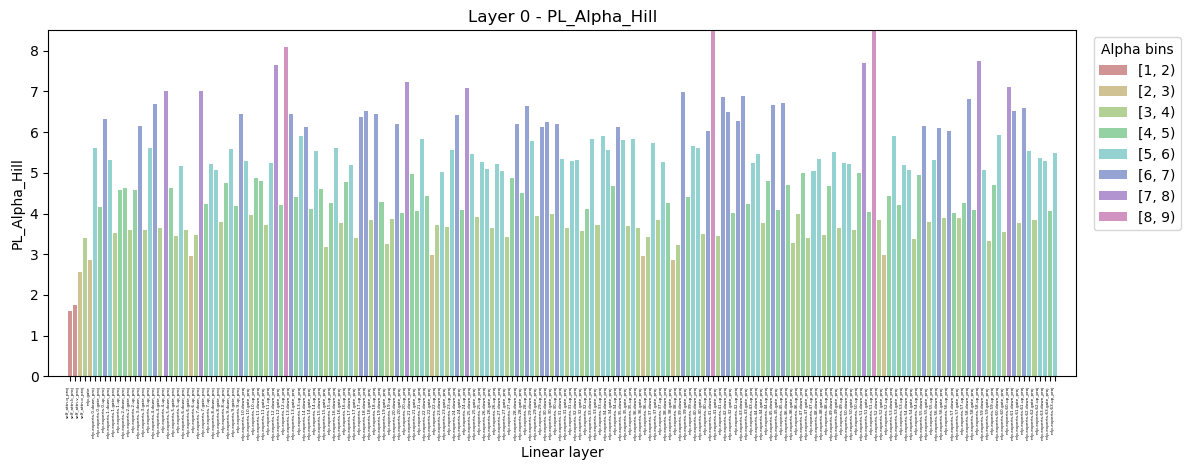

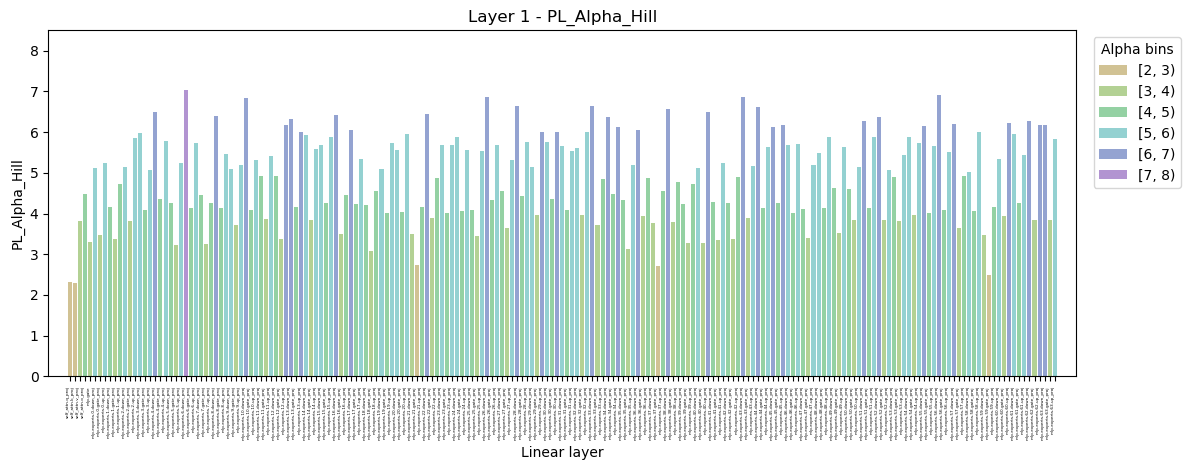

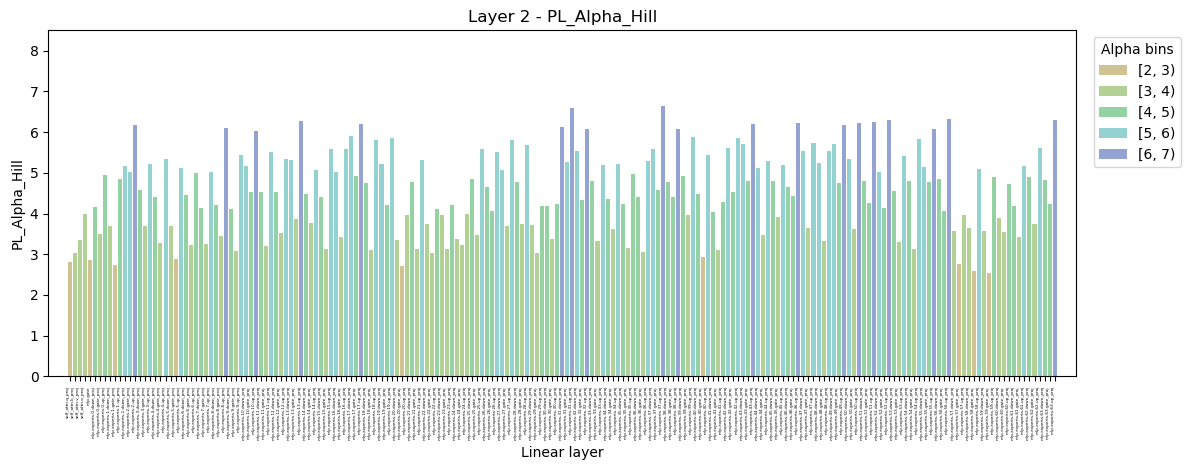

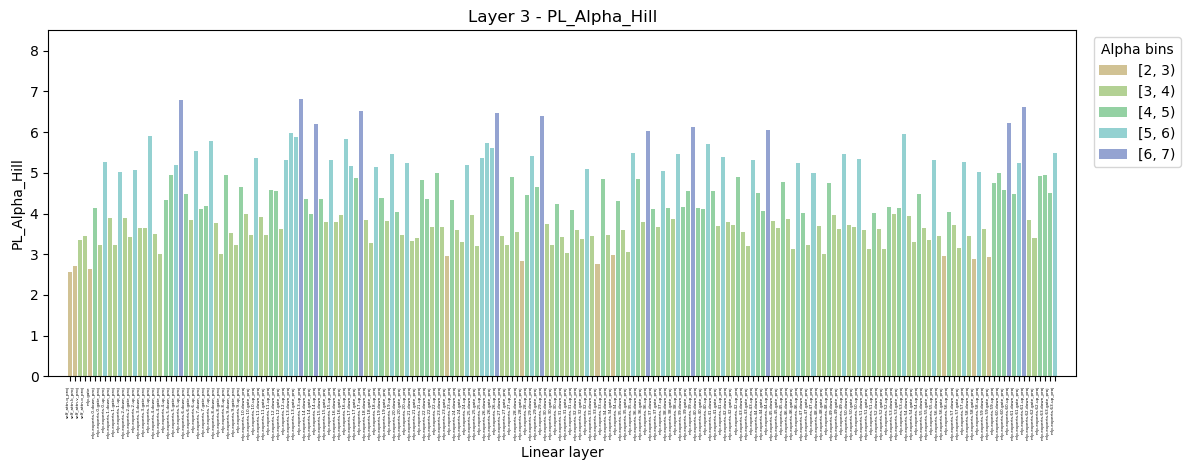

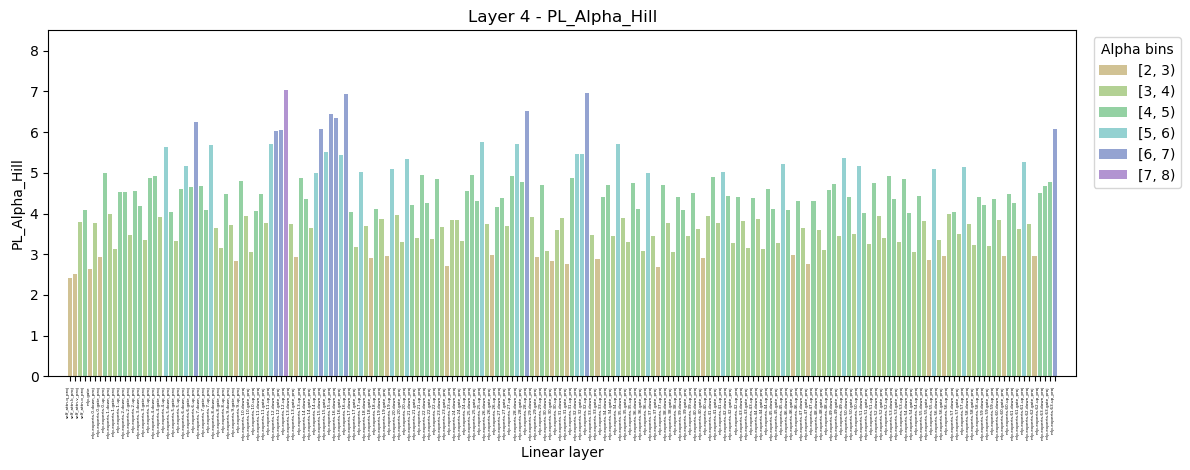

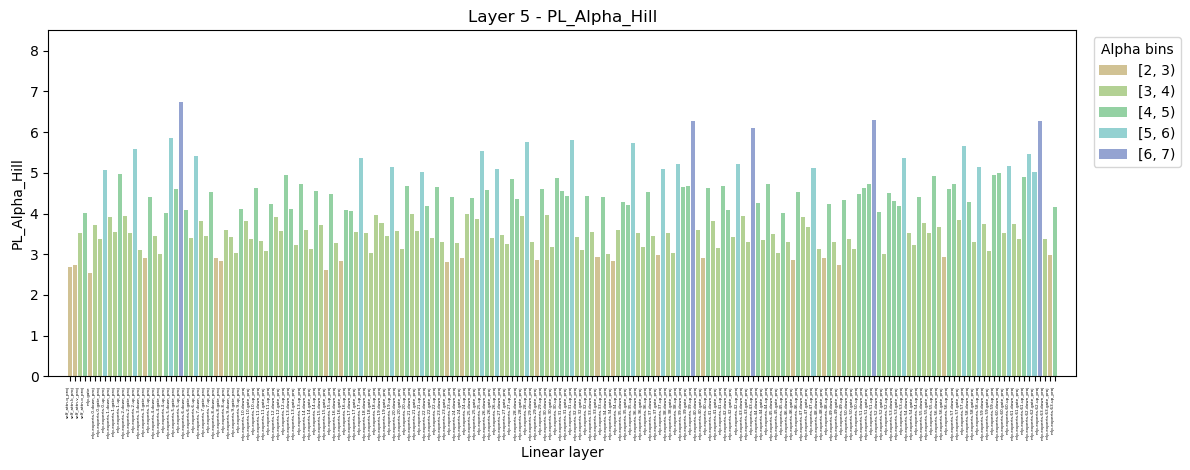

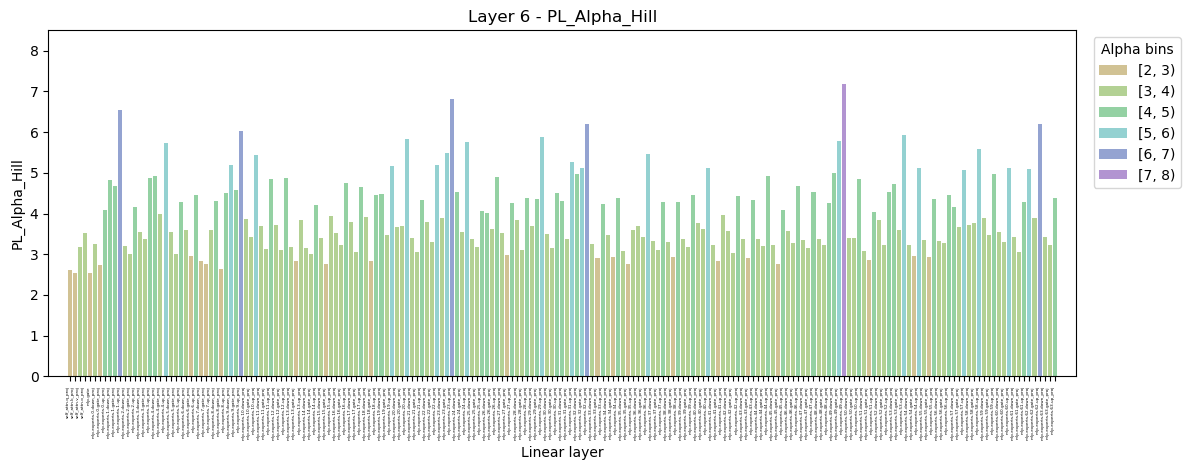

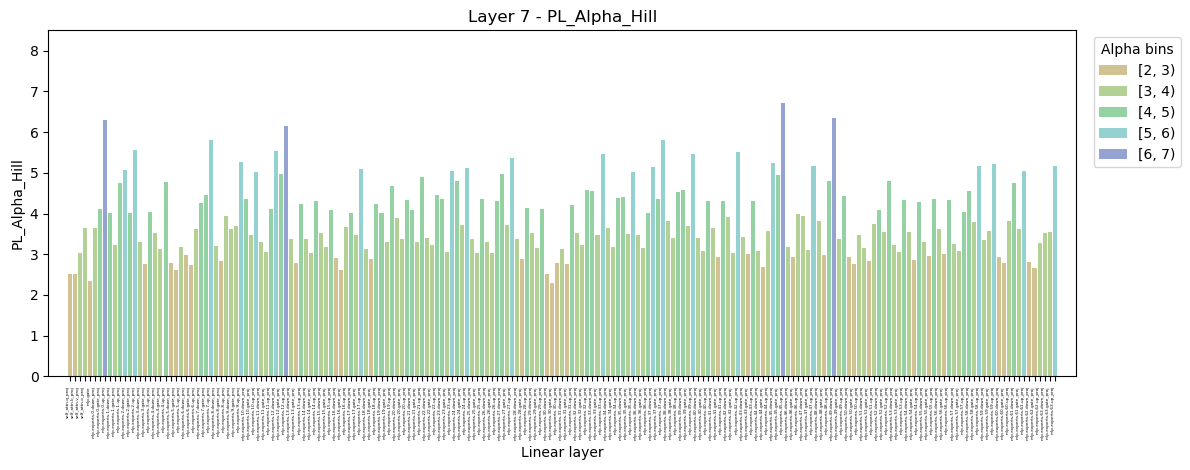

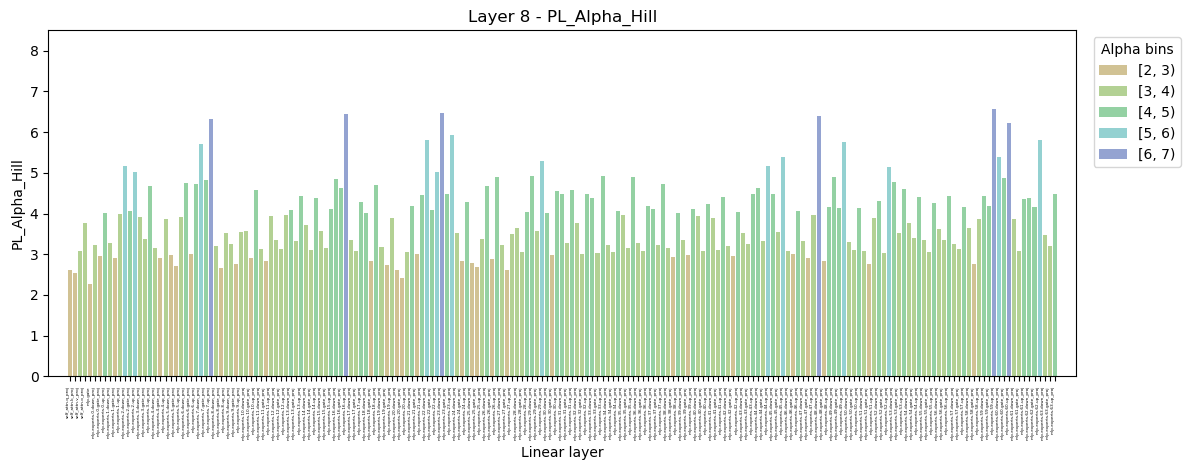

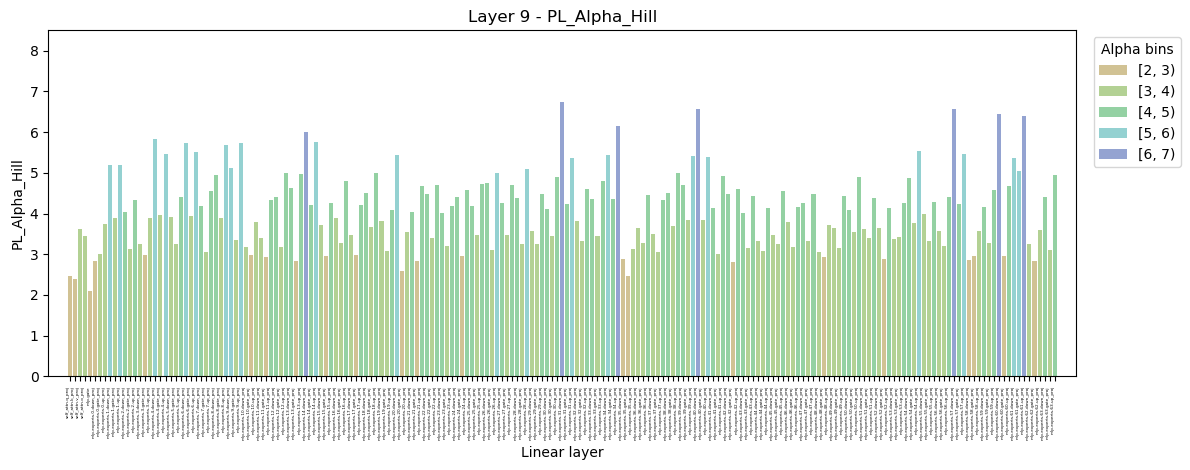

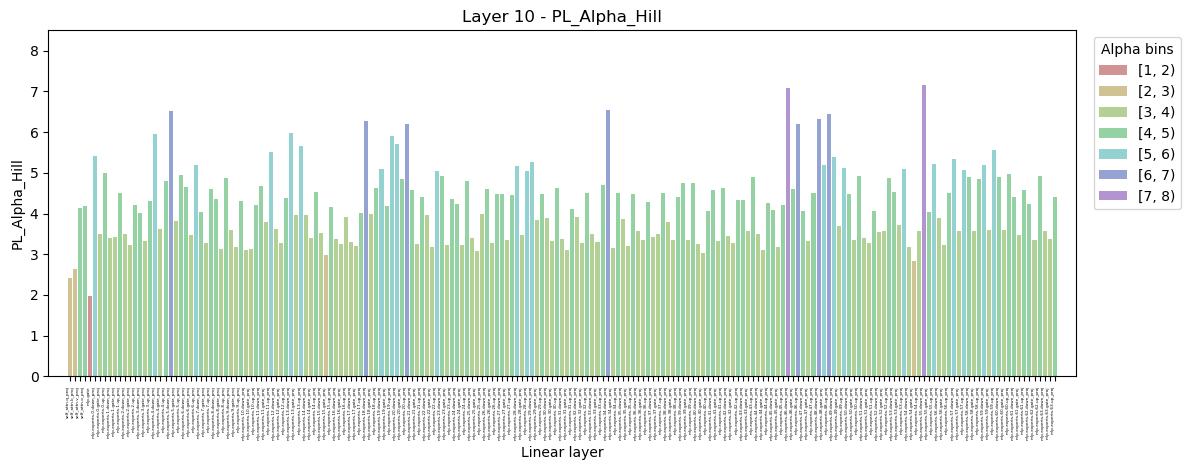

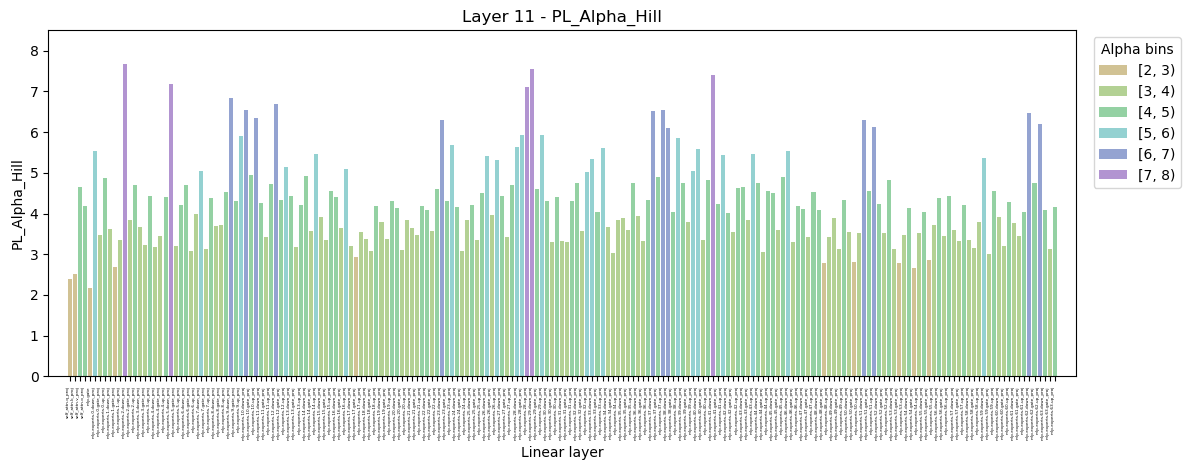

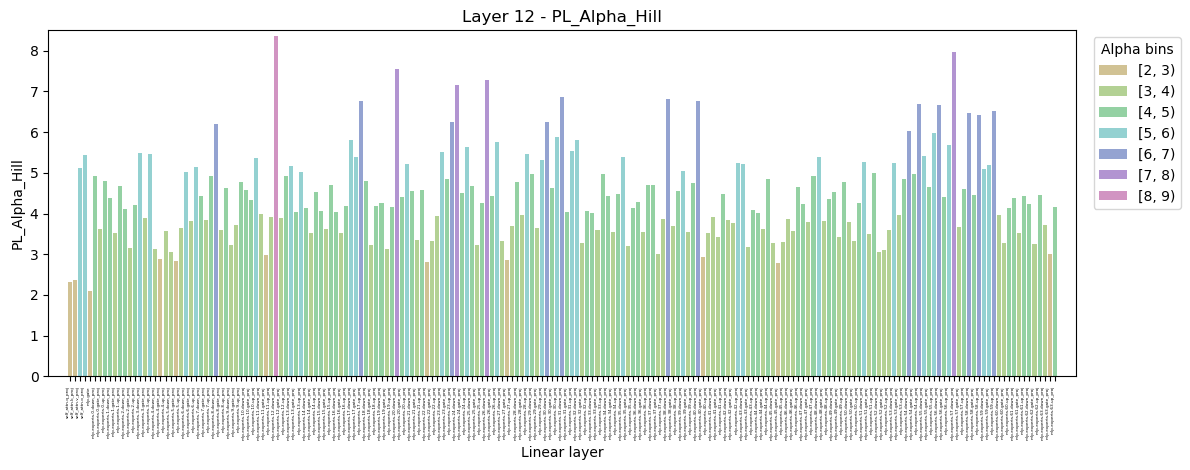

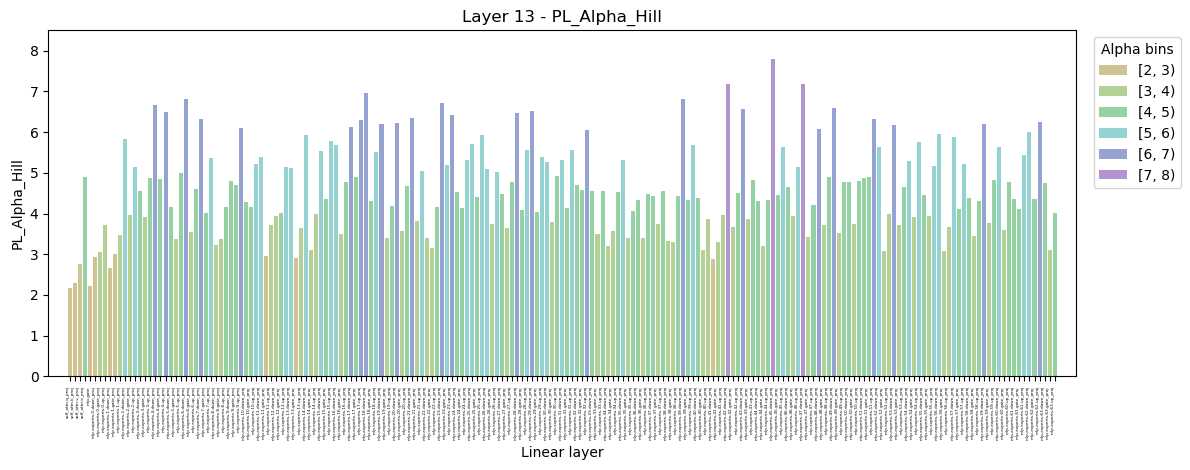

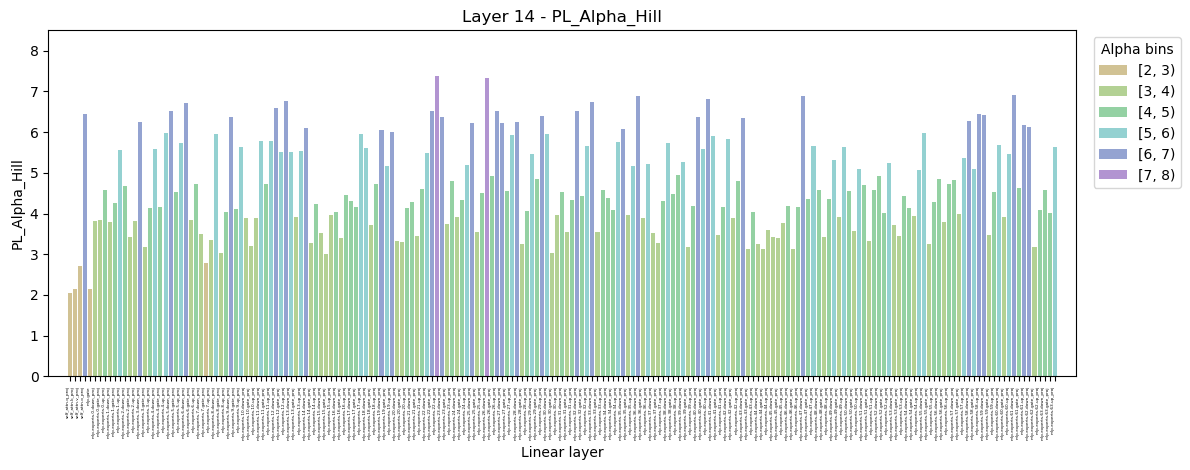

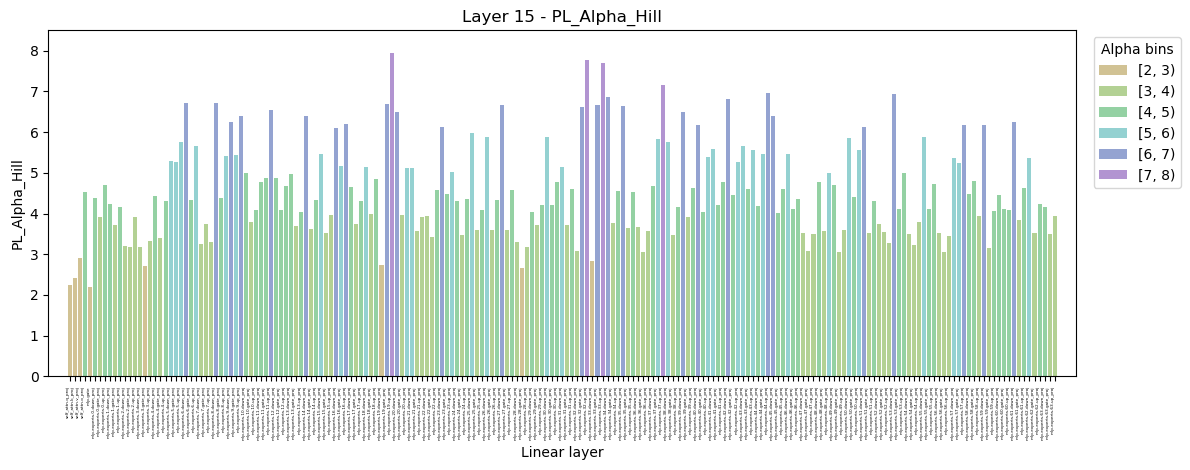

In [7]:
import os
import re
import colorsys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Prepare plotting dataframe
plot_df = df.copy()
plot_df = plot_df[plot_df["name"].str.contains(r"layers\.\d+")].copy()
plot_df["layer_id"] = plot_df["name"].str.extract(r"layers\.(\d+)", expand=False).astype(int)
plot_df["linear_name"] = plot_df["name"].str.extract(r"layers\.\d+\.(.+)$", expand=False)
plot_df["alpha"] = plot_df["alpha_hill"].astype(float)
plot_df = plot_df.dropna(subset=["alpha"]).copy()
plot_df["alpha_bin"] = np.floor(plot_df["alpha"]).astype(int)

# Low-saturation pastel colors, one per integer bin of alpha
unique_bins = sorted(plot_df["alpha_bin"].unique())

def pastel_color(index: int, total: int):
    hue = (index / max(total, 1)) % 1.0
    r, g, b = colorsys.hls_to_rgb(hue, 0.70, 0.40)
    return (r, g, b)

bin_to_color = {b: pastel_color(i, len(unique_bins)) for i, b in enumerate(unique_bins)}

# Ordering: q, k, v, o, gate/router, experts(0->63), others
ATTN_ORDER = {"attn_q": 0, "attn_k": 1, "attn_v": 2, "attn_o": 3}

def get_sort_tuple(name: str, category: str):
    name_l = (name or "").lower()
    cat = (category or "").lower()

    # Prefer explicit category if present
    if cat in ATTN_ORDER:
        return (ATTN_ORDER[cat], 0, "")
    # Fallback by name for attention projections
    if ".self_attn.q" in name_l or name_l.endswith("q_proj"):
        return (0, 0, "")
    if ".self_attn.k" in name_l or name_l.endswith("k_proj"):
        return (1, 0, "")
    if ".self_attn.v" in name_l or name_l.endswith("v_proj"):
        return (2, 0, "")
    if ".self_attn.o" in name_l or name_l.endswith("o_proj"):
        return (3, 0, "")

    # Gate / Router (gate first if both appear)
    if (cat == "router_or_gate" or "router" in name_l or ".mlp.gate" in name_l or "gate" in name_l) and "gate_proj" not in name_l:
        sub = 0 if "gate" in name_l else 1
        return (4, sub, name_l)

    # Experts, sorted by expert index ascending
    m = re.search(r"experts?[\._\[\-]?(\d+)", name_l)
    if not m:
        m = re.search(r"expert(\d+)", name_l)
    if m:
        expert_idx = int(m.group(1))
        return (5, expert_idx, name_l)

    # Others last, keep stable by name
    return (6, 0, name_l)

# Ensure output directory exists
out_dir = "/Users/superone77/Code/AlphaQuant/plots_alpha_hill"
os.makedirs(out_dir, exist_ok=True)

for layer_id in sorted(plot_df["layer_id"].unique()):
    layer_df = plot_df[plot_df["layer_id"] == layer_id].copy()
    layer_df["sort_tuple"] = layer_df.apply(lambda r: get_sort_tuple(r["name"], r.get("category", "")), axis=1)
    layer_df = layer_df.sort_values("sort_tuple", kind="mergesort").drop(columns=["sort_tuple"])  # stable sort

    positions = np.arange(len(layer_df))
    # Narrower width: 8–12 inches, proportional to number of bars
    fig_width = min(12, max(8, 0.5 * len(layer_df)))
    fig, ax = plt.subplots(figsize=(fig_width, 4.8))

    colors = [bin_to_color.get(b, (0.6, 0.6, 0.6)) for b in layer_df["alpha_bin"]]
    ax.bar(positions, layer_df["alpha"], color=colors)

    ax.set_title(f"Layer {layer_id} - PL_Alpha_Hill")
    ax.set_ylabel("PL_Alpha_Hill")
    ax.set_ylim(0, 8.5)
    ax.set_xlabel("Linear layer")
    ax.set_xticks(positions)
    ax.set_xticklabels(layer_df["linear_name"], rotation=90, ha="right", fontsize=3)
    ax.margins(x=0.02)

    # Legend only for bins present in this layer
    present_bins = sorted(layer_df["alpha_bin"].unique())
    handles = [Patch(facecolor=bin_to_color[b], label=f"[{b}, {b+1})") for b in present_bins]
    ax.legend(handles=handles, title="Alpha bins", loc="upper left", bbox_to_anchor=(1.01, 1.0))

    plt.tight_layout()
    # Save figure
    fname = os.path.join(out_dir, f"layer_{layer_id:02d}_pl_alpha_hill.png")
    fig.savefig(fname, dpi=500, bbox_inches="tight")
    plt.show()


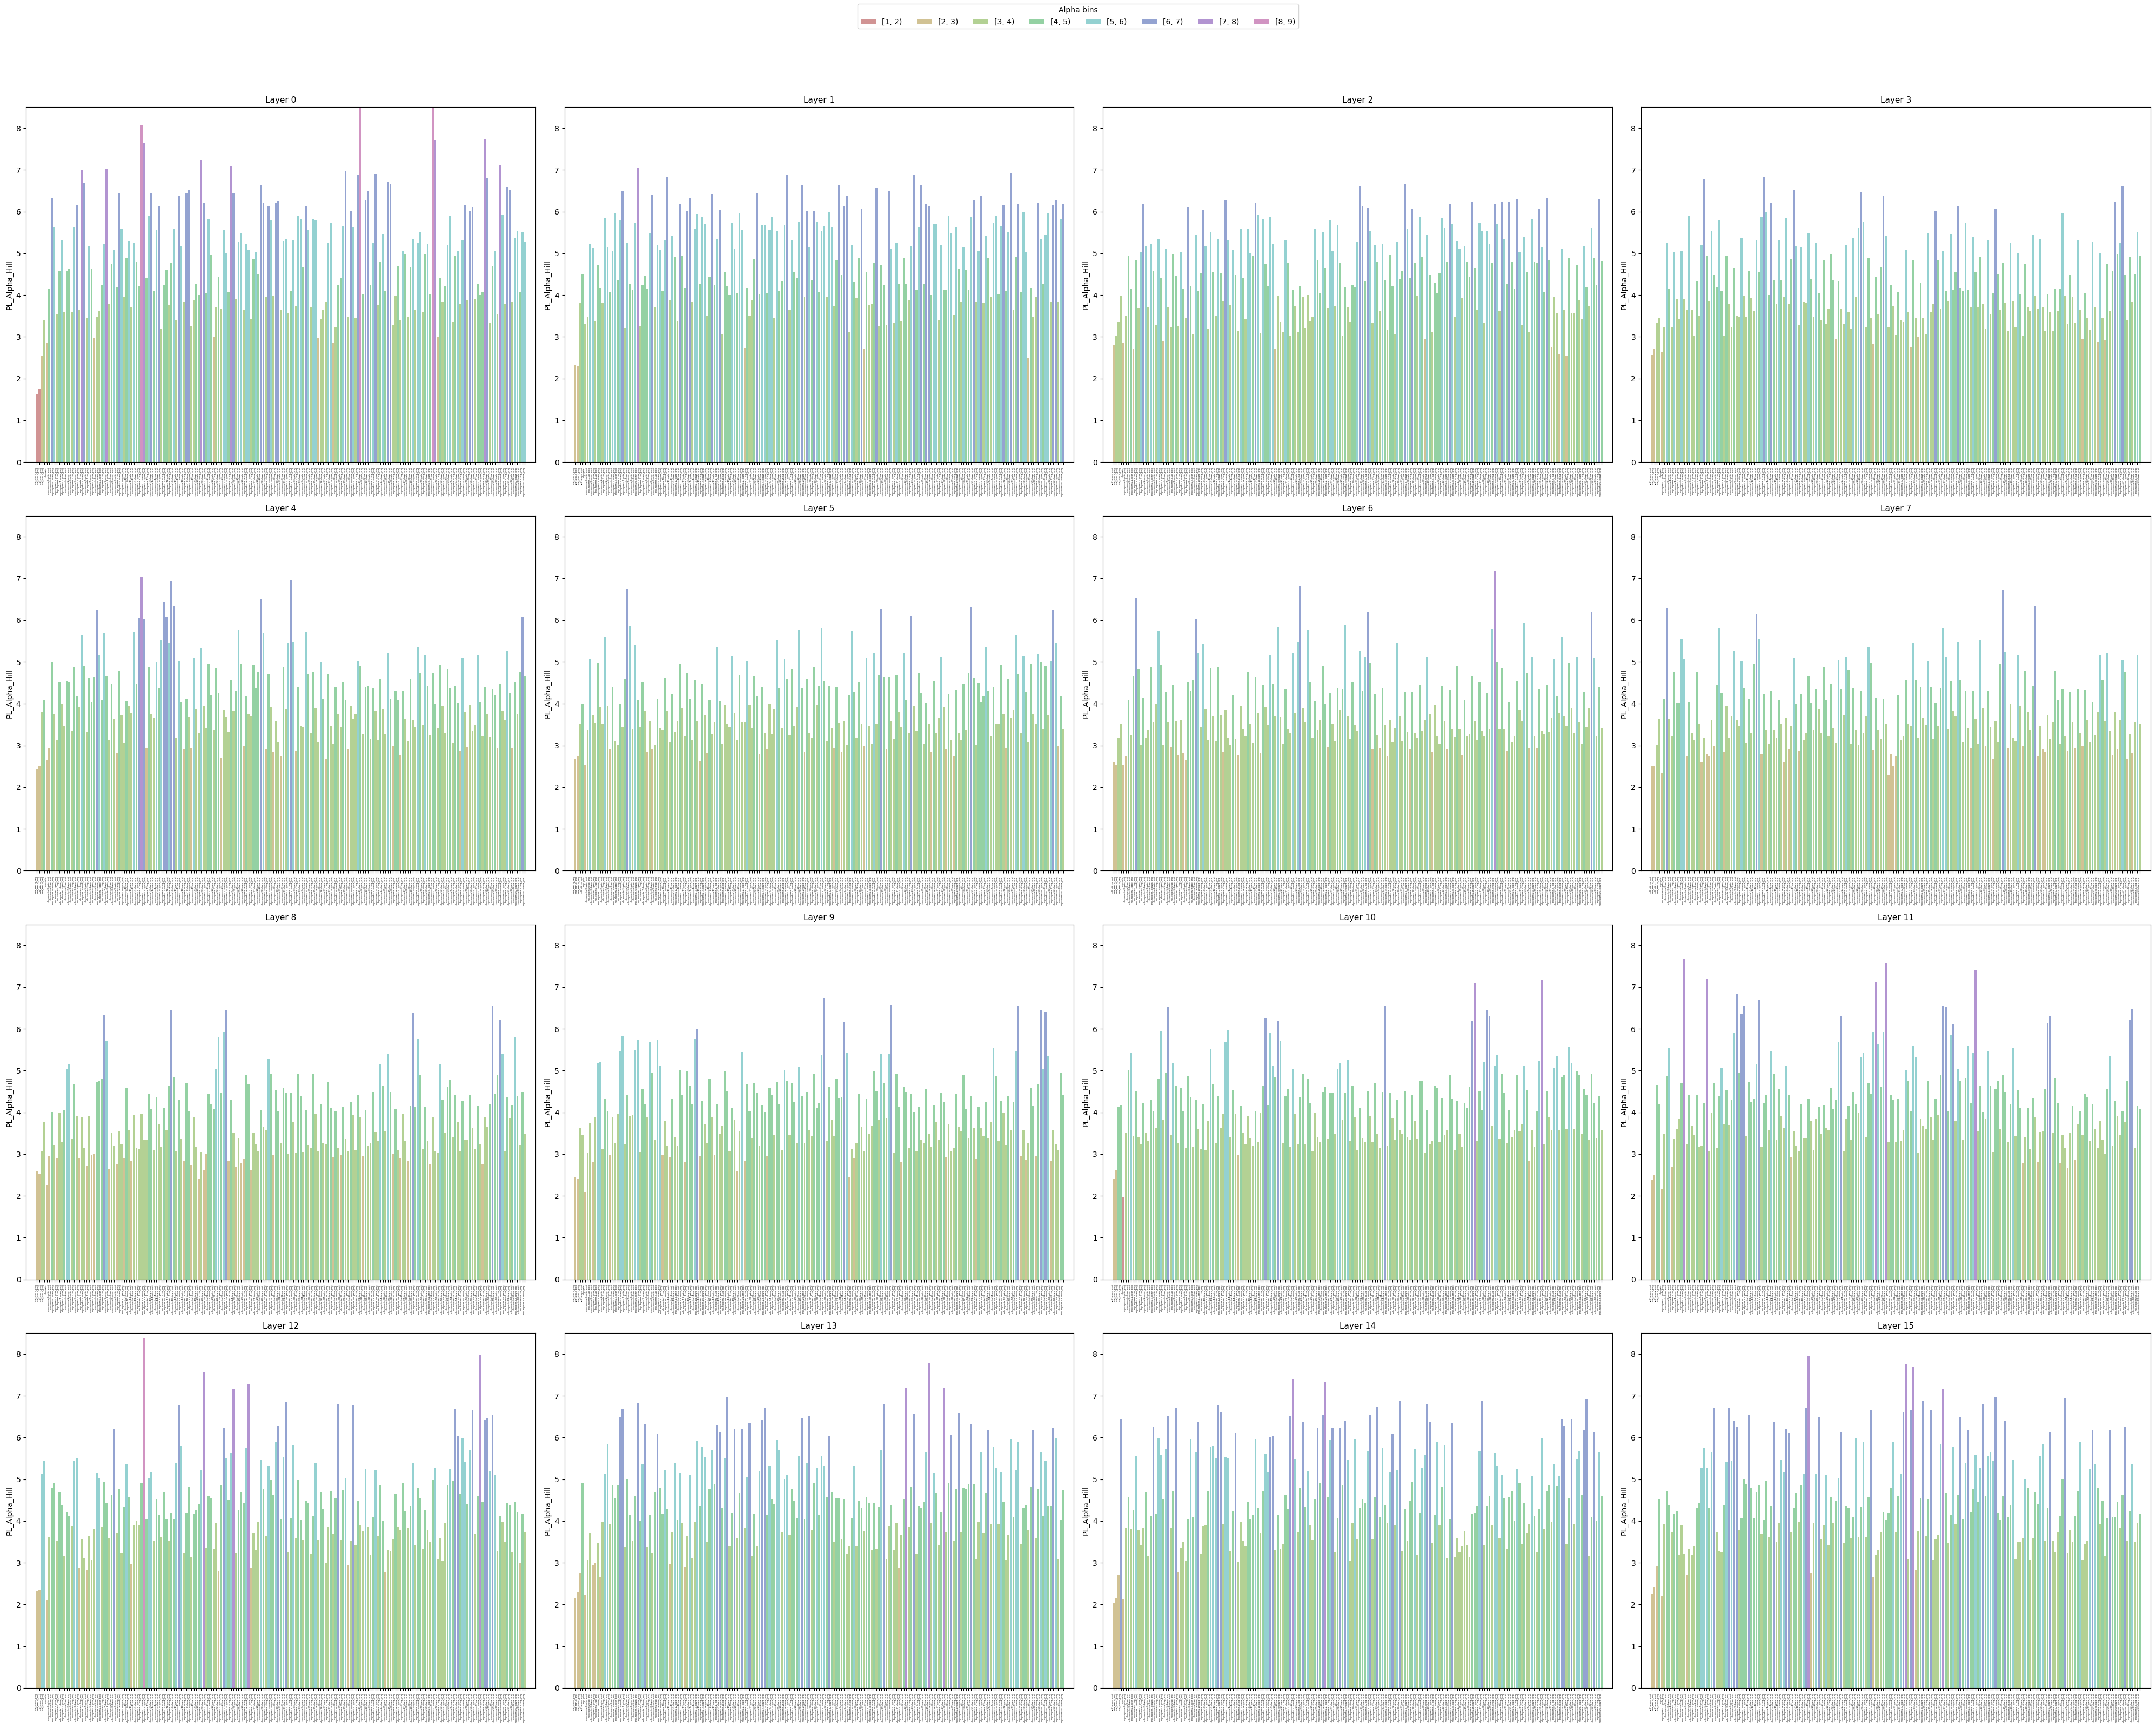

In [10]:
import os
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Reuse plot_df, bin_to_color produced in the previous cell
layers = sorted(plot_df["layer_id"].unique())
assert len(layers) >= 16, "Expected at least 16 layers in data"

rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(40, 32))  # large canvas for readability
axes = axes.reshape(-1)

for i, layer_id in enumerate(layers[: rows * cols]):
    ax = axes[i]
    layer_df = plot_df[plot_df["layer_id"] == layer_id].copy()
    positions = np.arange(len(layer_df))
    colors = [bin_to_color.get(b, (0.6, 0.6, 0.6)) for b in layer_df["alpha_bin"]]

    ax.bar(positions, layer_df["alpha"], color=colors)
    ax.set_title(f"Layer {layer_id}", fontsize=11)
    ax.set_ylabel("PL_Alpha_Hill")
    ax.set_ylim(0, 8.5)
    ax.set_xticks(positions)
    ax.set_xticklabels(layer_df["linear_name"], rotation=90, ha="right", fontsize=3)
    ax.margins(x=0.02)

# remove unused axes if any
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# one combined legend (bins across all layers present)
all_bins = sorted(plot_df["alpha_bin"].unique())
handles = [Patch(facecolor=bin_to_color[b], label=f"[{b}, {b+1})") for b in all_bins]
fig.legend(handles=handles, title="Alpha bins", loc="upper center", ncol=min(8, len(handles)))

plt.tight_layout(rect=(0, 0, 1, 0.95))

# Save combined figure
out_dir = "/Users/superone77/Code/AlphaQuant/plots_alpha_hill"
os.makedirs(out_dir, exist_ok=True)
combined_path = os.path.join(out_dir, "alpha_hill_layers_4x4.png")
fig.savefig(combined_path, dpi=500)
plt.show()



/var/folders/rw/82dttb3d7b5dllz7y0y39d3r0000gn/T/ipykernel_3343/2804909807.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  m = work["name"].str.contains(r"layers\.\d+\.mlp\.experts\.\d+\.(gate_proj|up_proj|down_proj)")


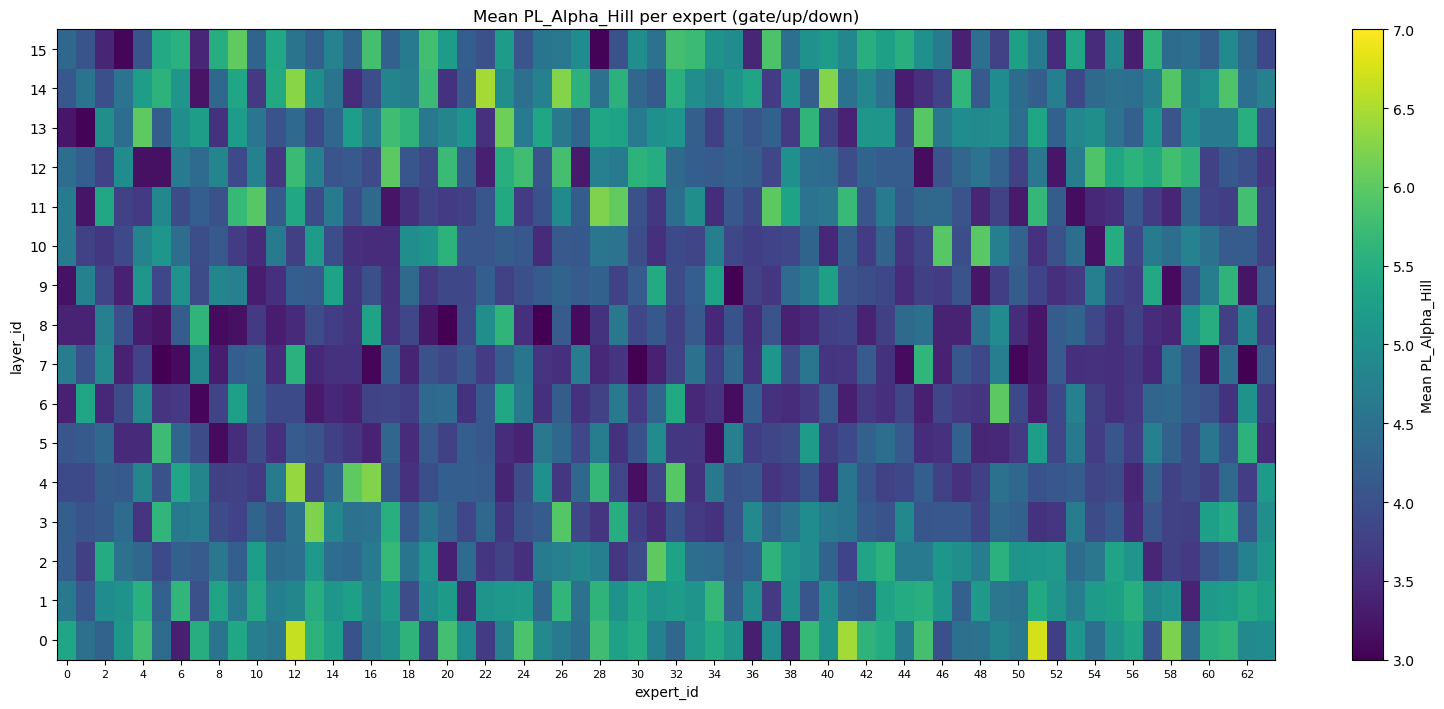

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute per-expert mean of (gate_proj, up_proj, down_proj) for each layer
work = df.copy()
work["alpha"] = pd.to_numeric(work["alpha_hill"], errors="coerce")

# keep only expert MLP projections
m = work["name"].str.contains(r"layers\.\d+\.mlp\.experts\.\d+\.(gate_proj|up_proj|down_proj)")
work = work[m].copy()

# extract layer_id, expert_id
work["layer_id"] = work["name"].str.extract(r"layers\.(\d+)", expand=False).astype(int)
work["expert_id"] = work["name"].str.extract(r"experts\.(\d+)", expand=False).astype(int)

# group and average across the three projections
mean_alpha = (
    work.dropna(subset=["alpha"])  # ignore missing
        .groupby(["layer_id", "expert_id"], as_index=False)["alpha"].mean()
)

# build heatmap matrix (layers x experts)
layers_sorted = sorted(mean_alpha["layer_id"].unique(), reverse=True)
max_expert = int(mean_alpha["expert_id"].max()) if not mean_alpha.empty else 0
experts_sorted = list(range(0, max_expert + 1))

heat_df = (
    mean_alpha.pivot(index="layer_id", columns="expert_id", values="alpha")
        .reindex(index=layers_sorted, columns=experts_sorted)
)

# plot heatmap
num_layers = len(layers_sorted)
num_experts = len(experts_sorted)
fig_w = min(22, max(12, 0.25 * num_experts))
fig_h = min(14, max(6, 0.45 * num_layers))
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

im = ax.imshow(heat_df.values, origin="upper", aspect="auto", cmap="viridis", vmin=3, vmax=7)

# ticks & labels
ax.set_yticks(np.arange(num_layers))
ax.set_yticklabels(layers_sorted)

# reduce x tick density for readability
step = 2 if num_experts > 40 else 1
x_idx = np.arange(0, num_experts, step)
ax.set_xticks(x_idx)
ax.set_xticklabels([experts_sorted[i] for i in x_idx], rotation=0, fontsize=8)

ax.set_xlabel("expert_id")
ax.set_ylabel("layer_id")
ax.set_title("Mean PL_Alpha_Hill per expert (gate/up/down)")

cb = fig.colorbar(im, ax=ax)
cb.set_label("Mean PL_Alpha_Hill")

plt.tight_layout()

# save
out_dir = "/Users/superone77/Code/AlphaQuant/plots_alpha_hill"
os.makedirs(out_dir, exist_ok=True)
fig.savefig(os.path.join(out_dir, "alpha_hill_expert_heatmap.png"), dpi=150, bbox_inches="tight")
plt.show()


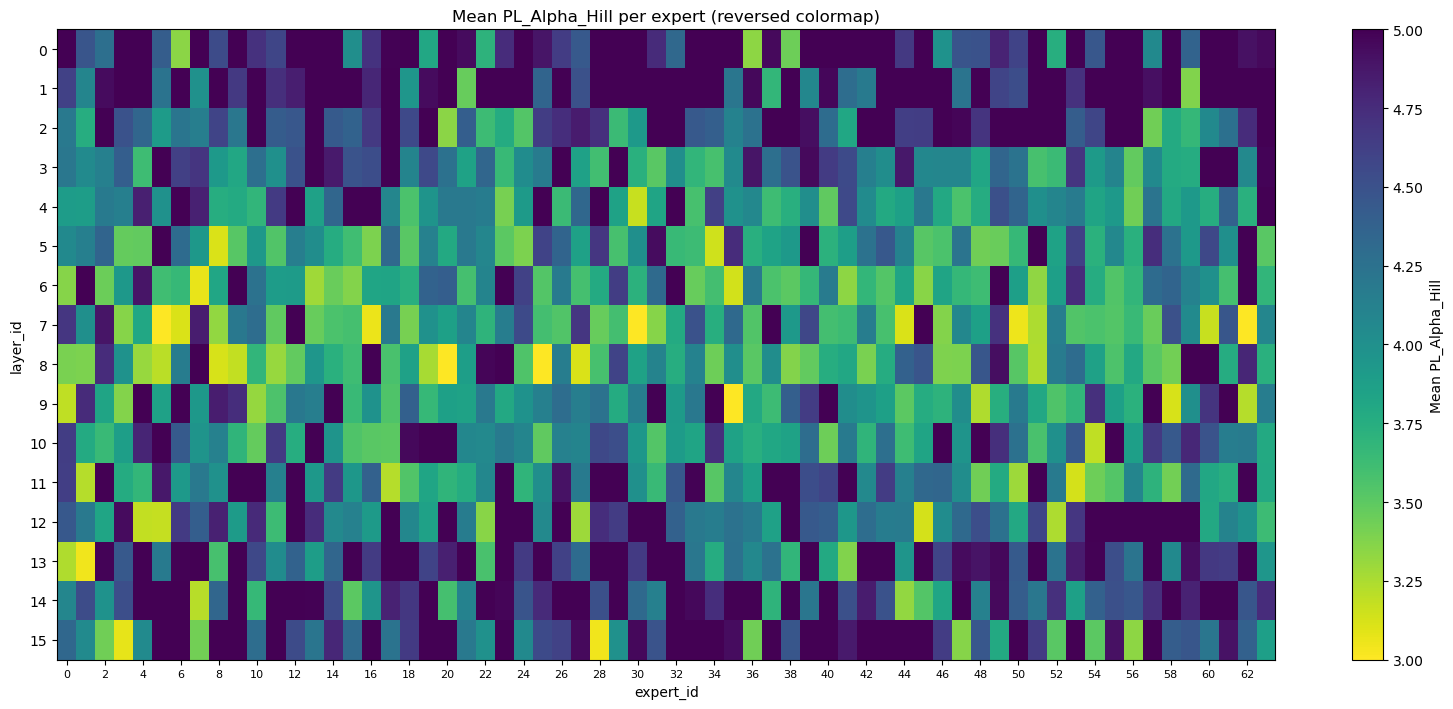

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Use existing heat_df if available from previous cell
assert 'heat_df' in globals(), 'Please run the heatmap computation cell first.'

layers_sorted = list(heat_df.index)
experts_sorted = list(heat_df.columns)
num_layers = len(layers_sorted)
num_experts = len(experts_sorted)

fig_w = min(22, max(12, 0.25 * num_experts))
fig_h = min(14, max(6, 0.45 * num_layers))
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

# Reverse colormap: larger values appear darker
im = ax.imshow(heat_df.values, origin='upper', aspect='auto', cmap='viridis_r', vmin=3, vmax=5)

ax.set_yticks(np.arange(num_layers))
ax.set_yticklabels(layers_sorted)

step = 2 if num_experts > 40 else 1
x_idx = np.arange(0, num_experts, step)
ax.set_xticks(x_idx)
ax.set_xticklabels([experts_sorted[i] for i in x_idx], rotation=0, fontsize=8)

ax.set_xlabel('expert_id')
ax.set_ylabel('layer_id')
ax.set_title('Mean PL_Alpha_Hill per expert (reversed colormap)')

cb = fig.colorbar(im, ax=ax)
cb.set_label('Mean PL_Alpha_Hill')

plt.tight_layout()

out_dir = '/Users/superone77/Code/AlphaQuant/plots_alpha_hill'
os.makedirs(out_dir, exist_ok=True)
fig.savefig(os.path.join(out_dir, 'alpha_hill_expert_heatmap_rev.png'), dpi=150, bbox_inches='tight')
plt.show()
